In [22]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# select the style from fivethityeight website
plt.style.use('fivethirtyeight') 
mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['axes.labelsize'] = 14
# mpl.rcParams['xtick.labelsize'] = 12
# mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

# predefined figsize
figsize=(12,9)

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

# References
* https://medium.com/@dcamarena0229/time-series-split-with-scikit-learn-de7ec17d69cd
* https://machinelearningmastery.com/time-series-seasonality-with-python/
* https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru
* https://machinelearningmastery.com/make-sample-forecasts-arima-python/
* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
* https://towardsdatascience.com/forecasting-exchange-rates-using-arima-in-python-f032f313fc56
* https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series/
* https://www.kaggle.com/akm5160/arma-1-1-garch-1-1
* https://machinelearningmastery.com/time-series-seasonality-with-python/
* https://towardsdatascience.com/time-series-analysis-for-machine-learning-with-python-626bee0d0205
* https://towardsdatascience.com/multivariate-time-series-forecasting-using-random-forest-2372f3ecbad1
* https://medium.com/@dcamarena0229/time-series-split-with-scikit-learn-de7ec17d69cd
* https://www.machinelearningplus.com/time-series/time-series-analysis-python/
* https://www.kaggle.com/kashnitsky/mlcourse
* https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python

# Data Sources
* https://fred.stlouisfed.org
* https://community.tableau.com/docs/DOC-1236

# Examples
* https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
* https://www.ethanrosenthal.com/2018/01/28/time-series-for-scikit-learn-people-part1/


In [23]:
consumption = pd.read_csv('others/pct_change_real_personal_consumption_DPCERL1Q225SBEA.csv', index_col='Date', parse_dates=['Date'])
income = pd.read_csv('others/pct_change_real_personal_income_A067RO1Q156NBEA.csv', index_col='Date', parse_dates=['Date'])

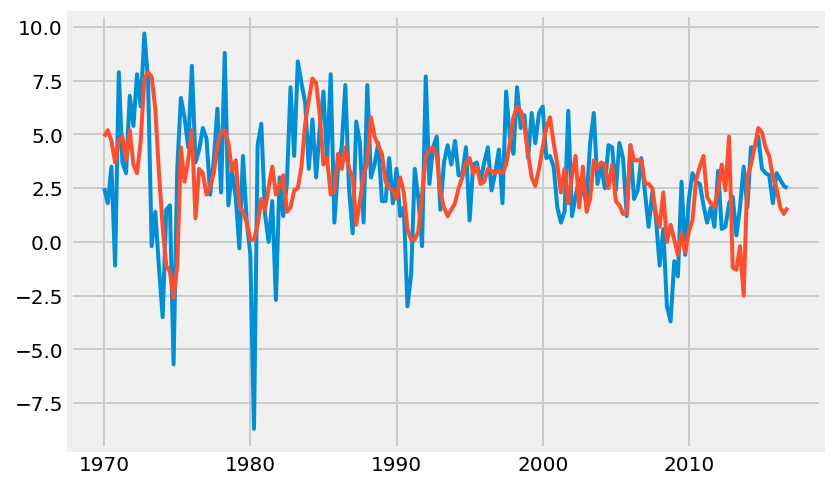

In [24]:
plt.plot(consumption['1970':'2016'])
plt.plot(income['1970':'2016'])

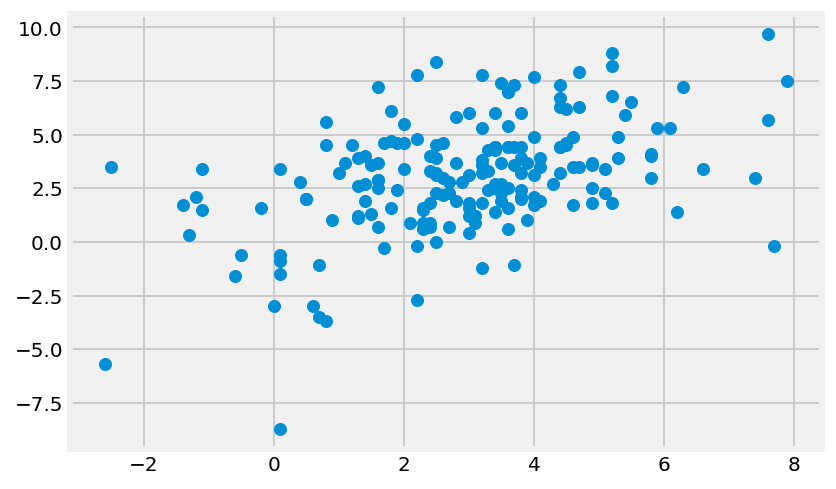

In [13]:
plt.scatter(income['1970':'2016'].values,consumption['1970':'2016'].values)

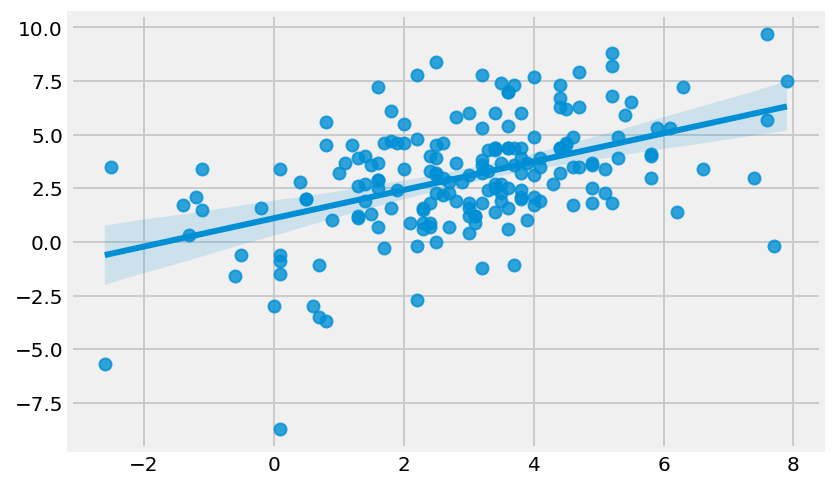

In [14]:
sns.regplot(income['1970':'2016'].values,consumption['1970':'2016'].values)

Data from https://fred.stlouisfed.org

In [15]:
from sklearn.model_selection import TimeSeriesSplit

In [16]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

In [18]:
y

array([1, 2, 3, 4, 5, 6])

In [24]:
tss = TimeSeriesSplit(n_splits = 4)
# This was the trickiest part as a newbie. Straight from the docs
# If you only have experience with CV splits this way
# of making the splits might seem foreign. Fret not.
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    print(str(test_index))

[2]
[3]
[4]
[5]


In [30]:
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)
TimeSeriesSplit(max_train_size=2, n_splits=3)
for train, test in tscv.split(X):
    print("%s %s" % (train, test))


TimeSeriesSplit(max_train_size=None, n_splits=5)
[0] [1]
[0 1] [2]
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


In [259]:
apple = pd.read_csv('stocks/2020/AAPL_2006-01-01_to_2020-05-01.csv', index_col='Date', parse_dates=['Date'])
google = pd.read_csv('stocks/2020/GOOGL_2006-01-01_to_2020-05-01.csv', index_col='Date', parse_dates=['Date'])
amazon = pd.read_csv('stocks/2020/AMZN_2006-01-01_to_2020-05-01.csv', index_col='Date', parse_dates=['Date'])
microsoft = pd.read_csv('stocks/2020/MSFT_2006-01-01_to_2020-05-01.csv', index_col='Date', parse_dates=['Date'])
boeing = pd.read_csv('stocks/2020/BA_2006-01-01_to_2020-05-01.csv', index_col='Date', parse_dates=['Date'])
all_stocks = pd.read_csv('stocks/2020/all_stocks_2006-01-01_to_2020-05-01.csv', index_col='Date', parse_dates=['Date'])
all_stocks = all_stocks.groupby('Date').mean()

stocks = google.Close[:'2020-02-01'].to_frame('GOOG')
stocks = stocks.join(amazon.Close[:'2020-02-01'].to_frame('AMZN'))
stocks = stocks.join(microsoft.Close[:'2020-02-01'].to_frame('MSFT'))
stocks = stocks.join(boeing.Close[:'2020-02-01'].to_frame('BA'))
stocks = stocks.join(apple.Close[:'2020-02-01'].to_frame('AAPL'))
stocks = stocks.join(all_stocks.Close[:'2020-02-01'].to_frame('ALL'))


Since we might want to analyse seasonality, we need to have the same datapoints for each year. Since stock market data don't include weekends and holidays, we resample the data with daily frequency. Since some values are missing we will use the previous valid value to fill the gaps.

In [264]:
stocks

GOOG         AMZN        MSFT          BA        AAPL  \
Date                                                                       
2006-01-03   217.832840    47.580002   26.840000   70.440002   10.678572   
2006-01-04   222.842850    47.250000   26.969999   71.169998   10.710000   
2006-01-05   225.845840    47.650002   26.990000   70.330002   10.625714   
2006-01-06   233.063065    47.869999   26.910000   69.349998   10.900000   
2006-01-09   233.683685    47.080002   26.860001   68.769997   10.864285   
...                 ...          ...         ...         ...         ...   
2020-01-27  1431.729980  1828.339966  162.279999  316.600006  308.950012   
2020-01-28  1450.500000  1853.250000  165.460007  316.559998  317.690002   
2020-01-29  1456.699951  1858.000000  168.039993  322.019989  324.339996   
2020-01-30  1454.250000  1870.680054  172.779999  323.299988  323.869995   
2020-01-31  1432.780029  2008.719971  170.229996  318.269989  309.510010   

                   ALL  
Date                    
2006-01-03   51.426994  
2006-01-04   51.643100  
2006-01-05   51.735527  
2006-01-06   52.405439  
2006-01-09   52.575174  
...                ...  
2020-01-27  239.262998  
2020-01-28  241.591667  
2020-01-29  241.919997  
2020-01-30  242.807668  
2020-01-31  244.143000  

[3544 rows x 6 columns]

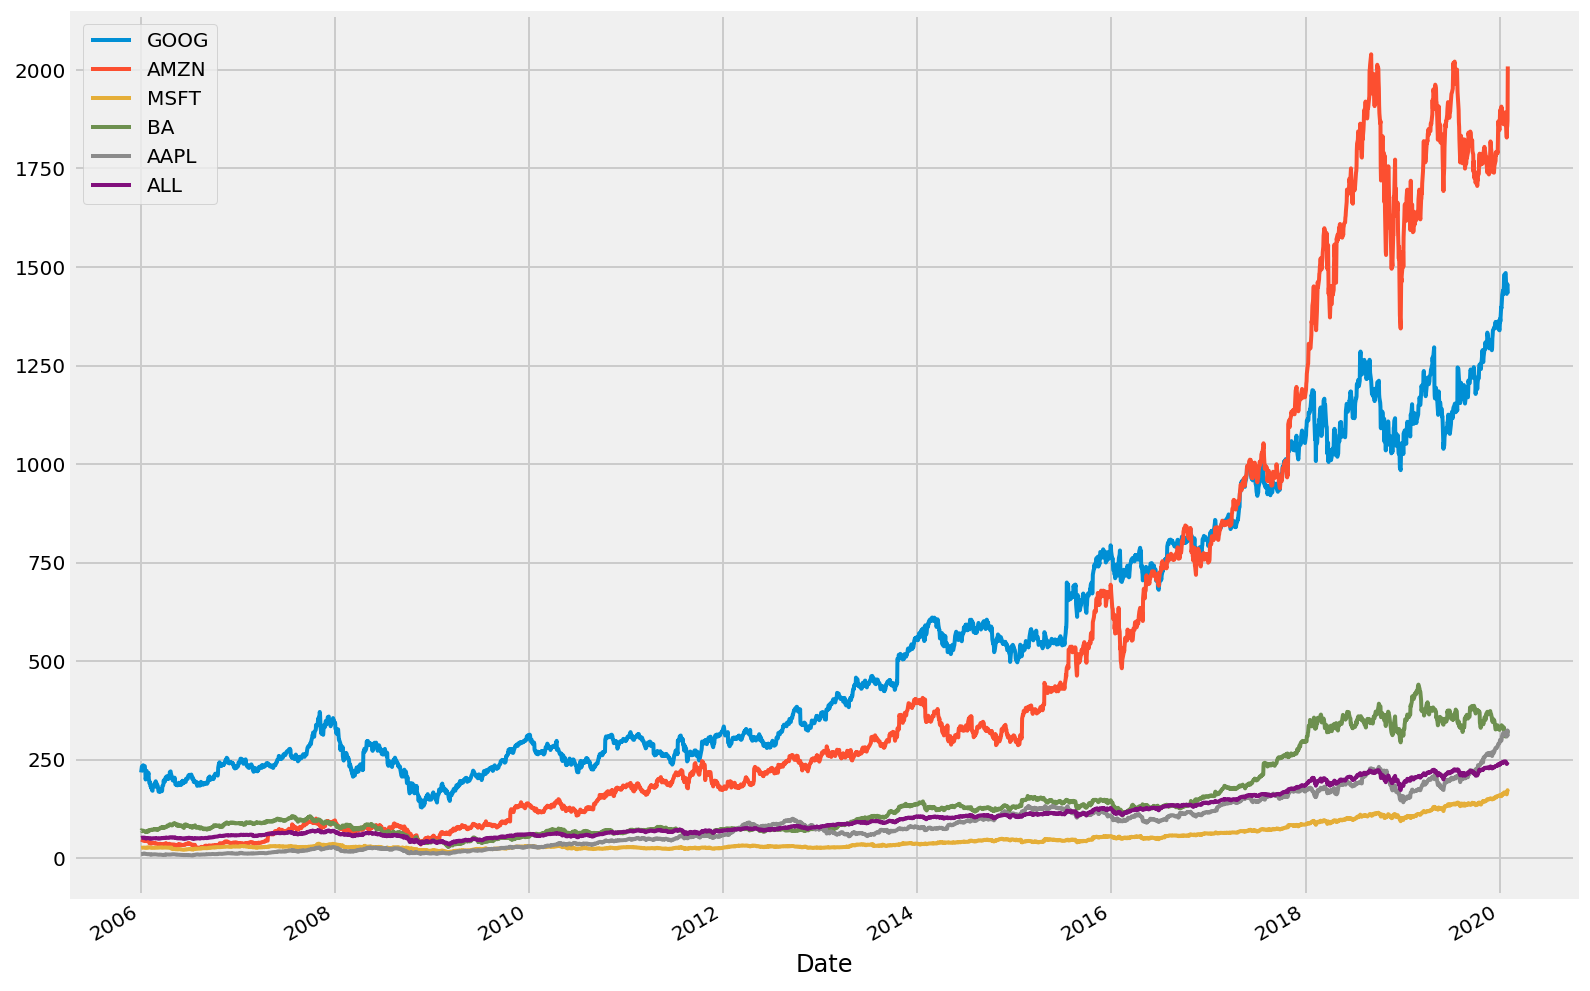

In [34]:
stocks.plot(figsize=figsize);

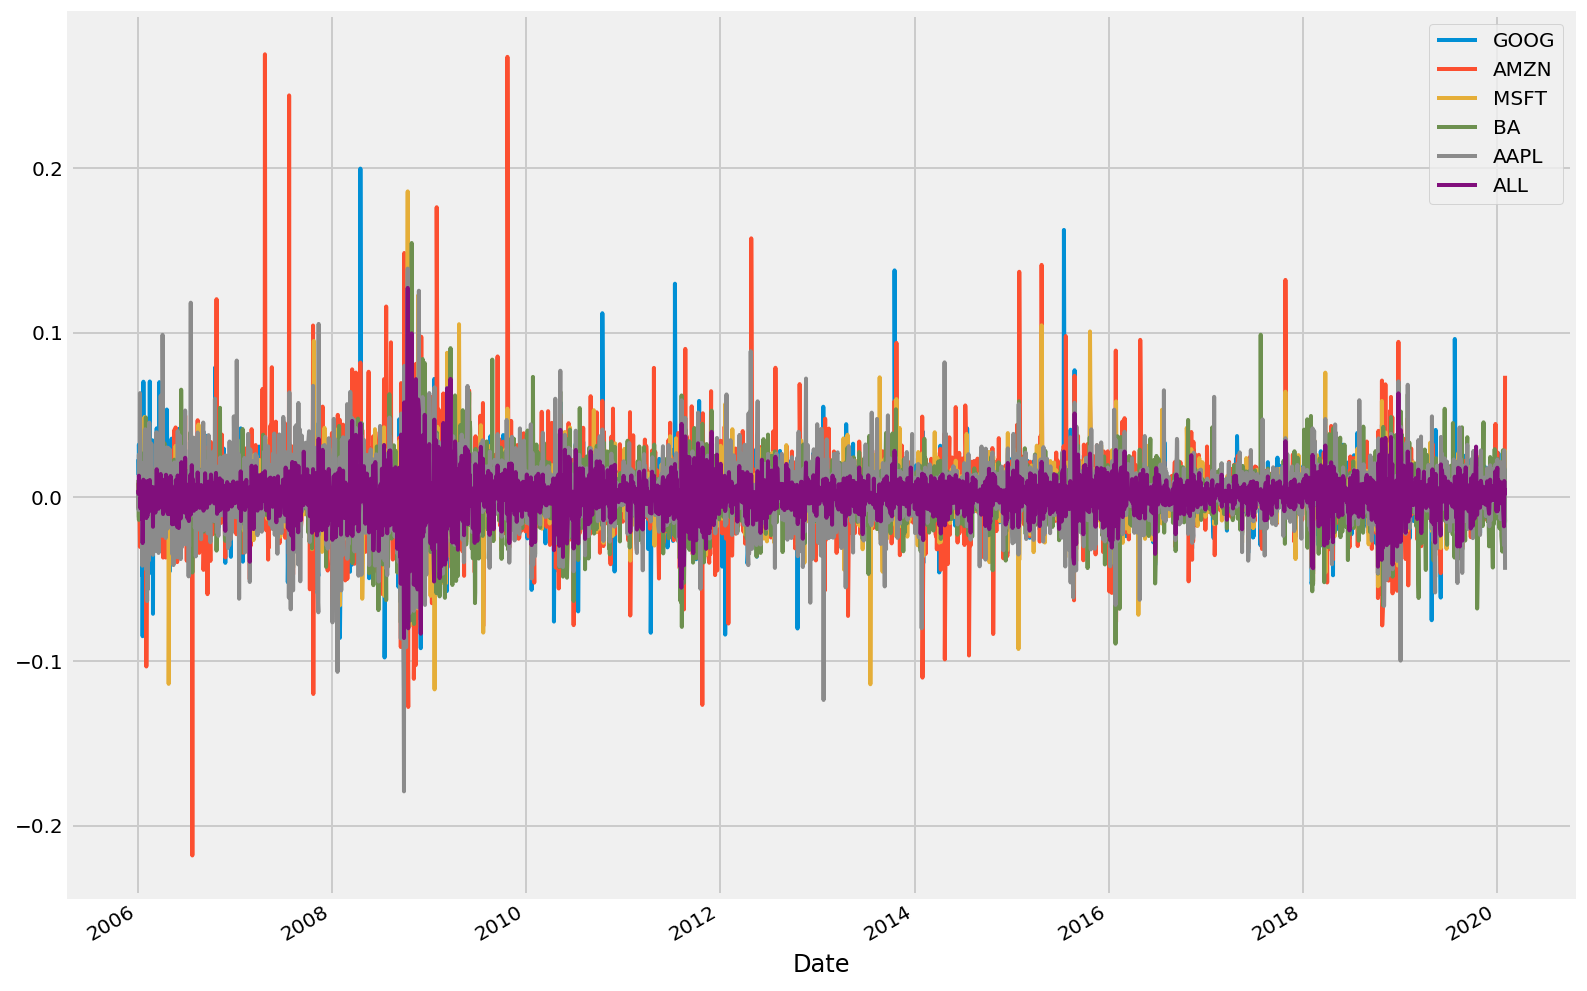

In [42]:
daily_returns.plot(figsize=figsize)

In [82]:
daily_returns = stocks.pct_change().dropna()

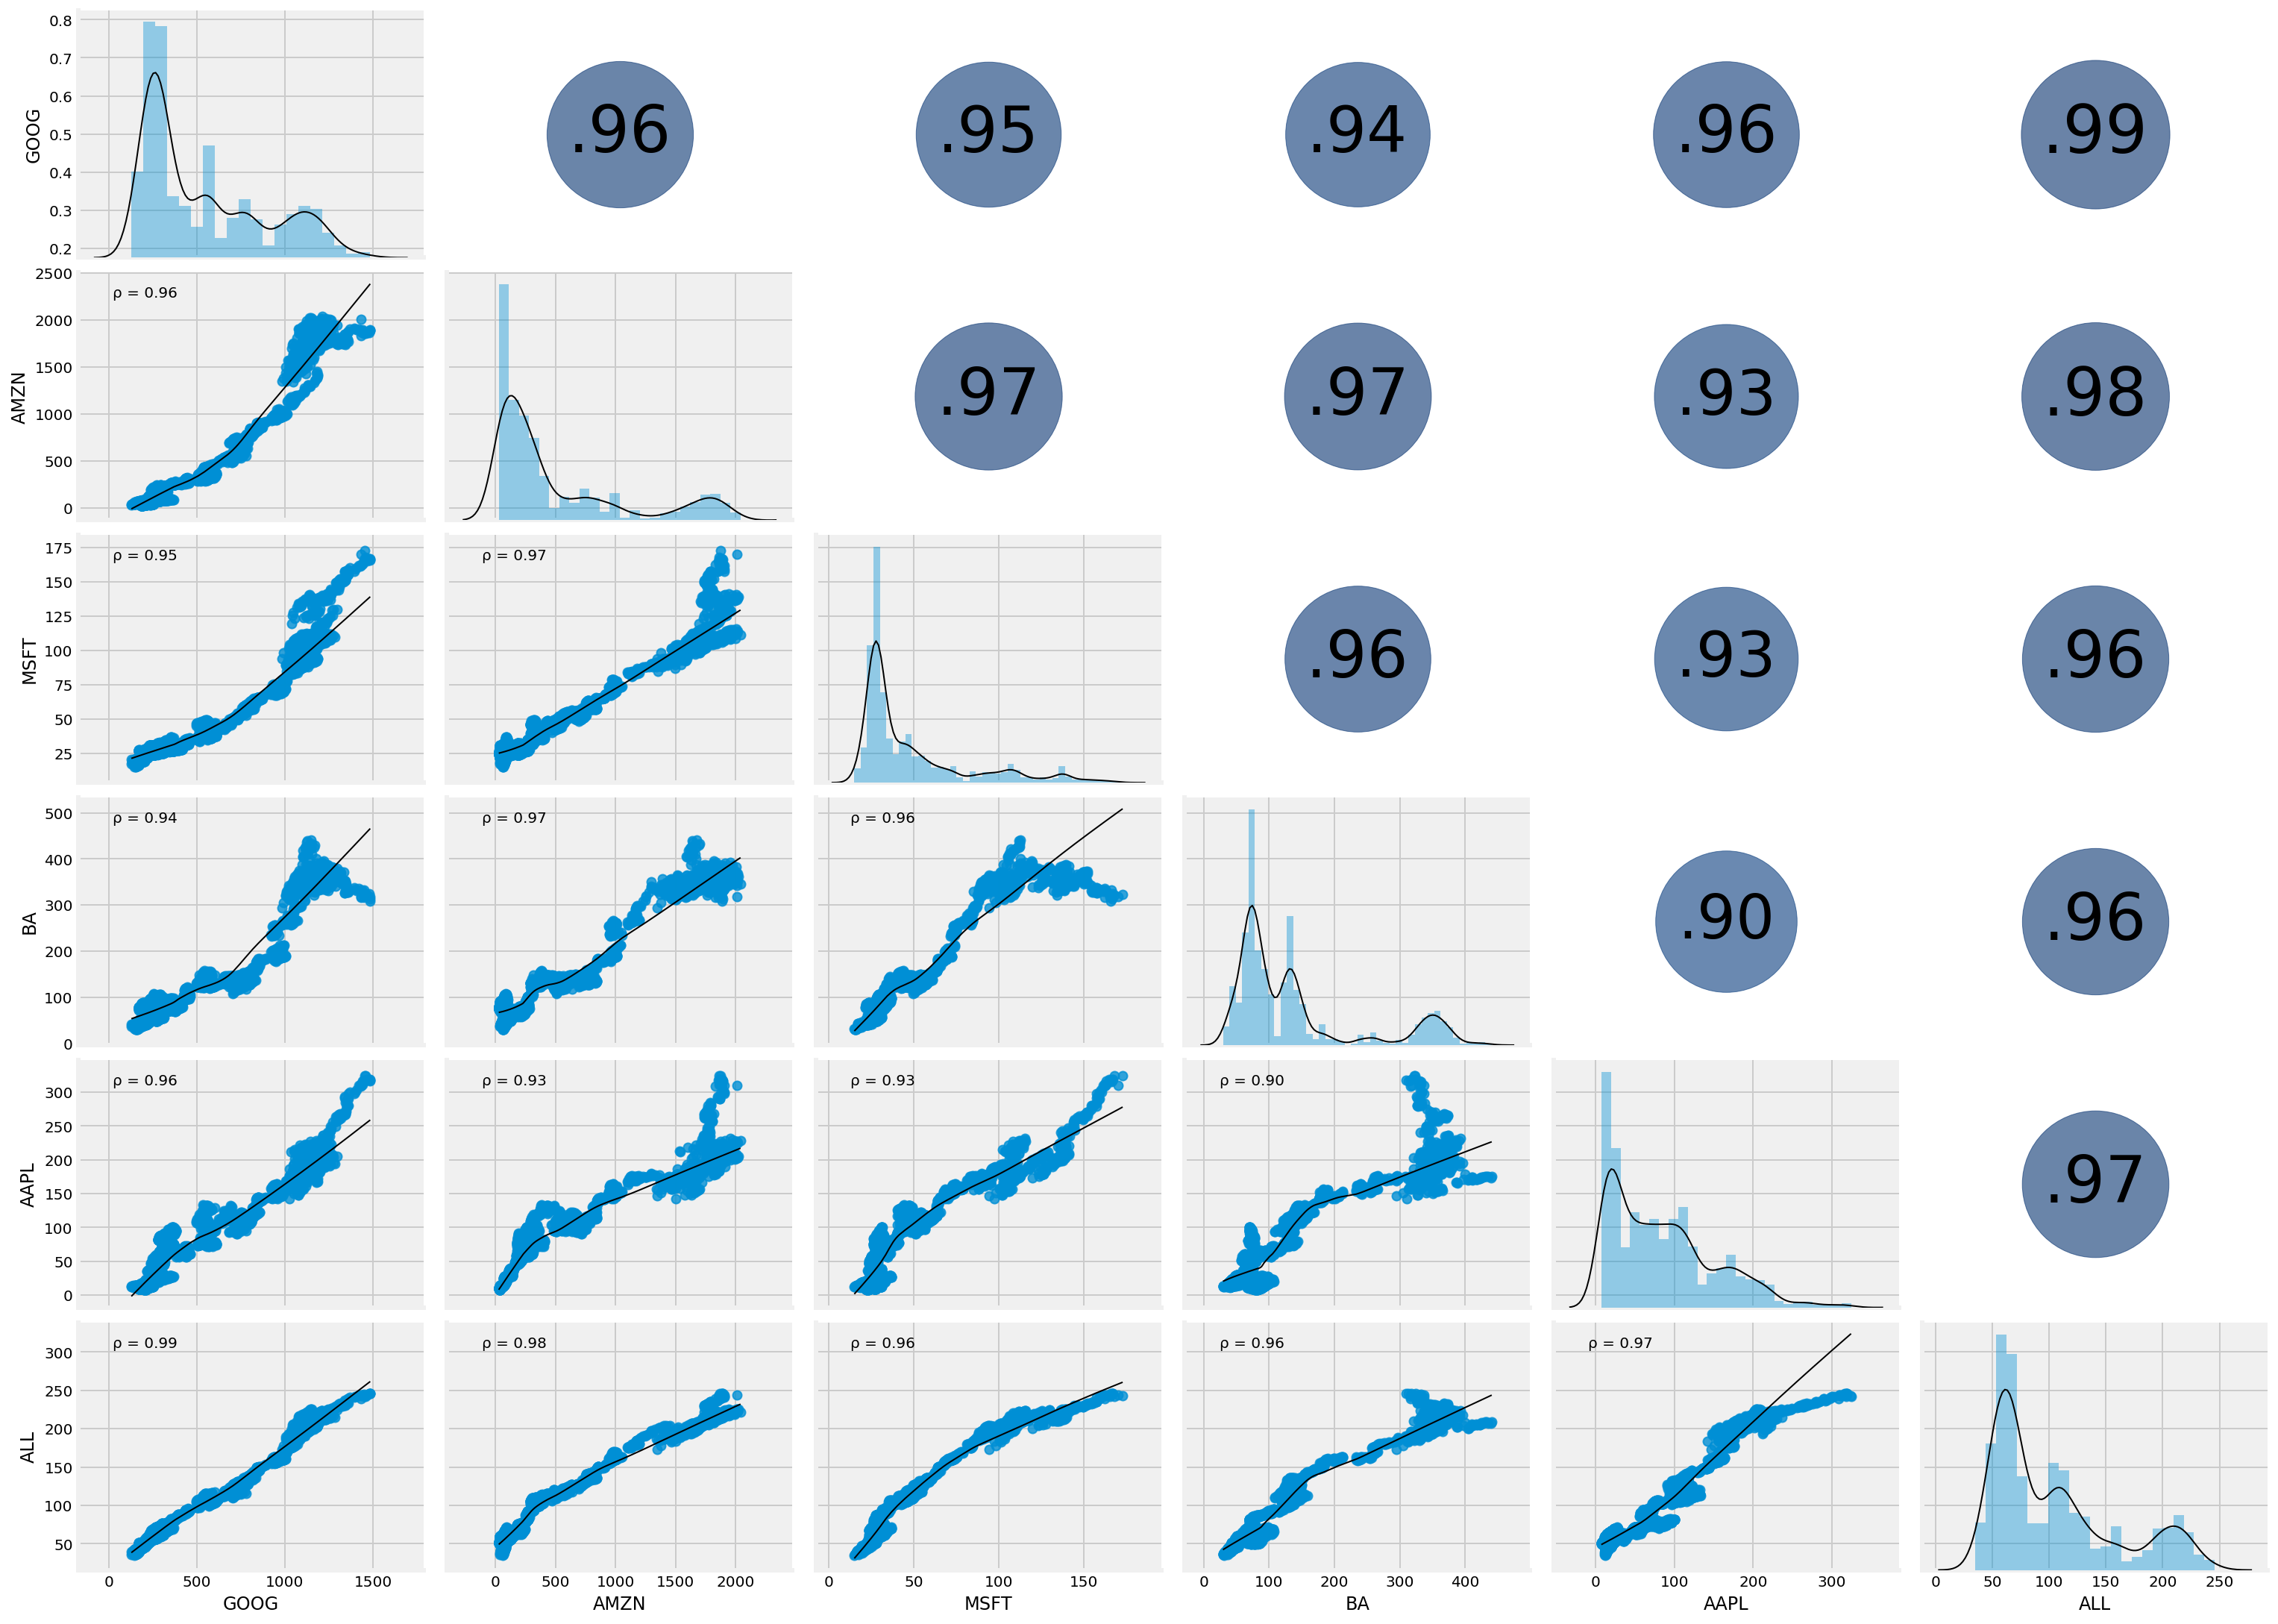

In [83]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)    
    
# g = sns.pairplot(stocks,palette=["Blues_d"])
g = sns.PairGrid(stocks, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

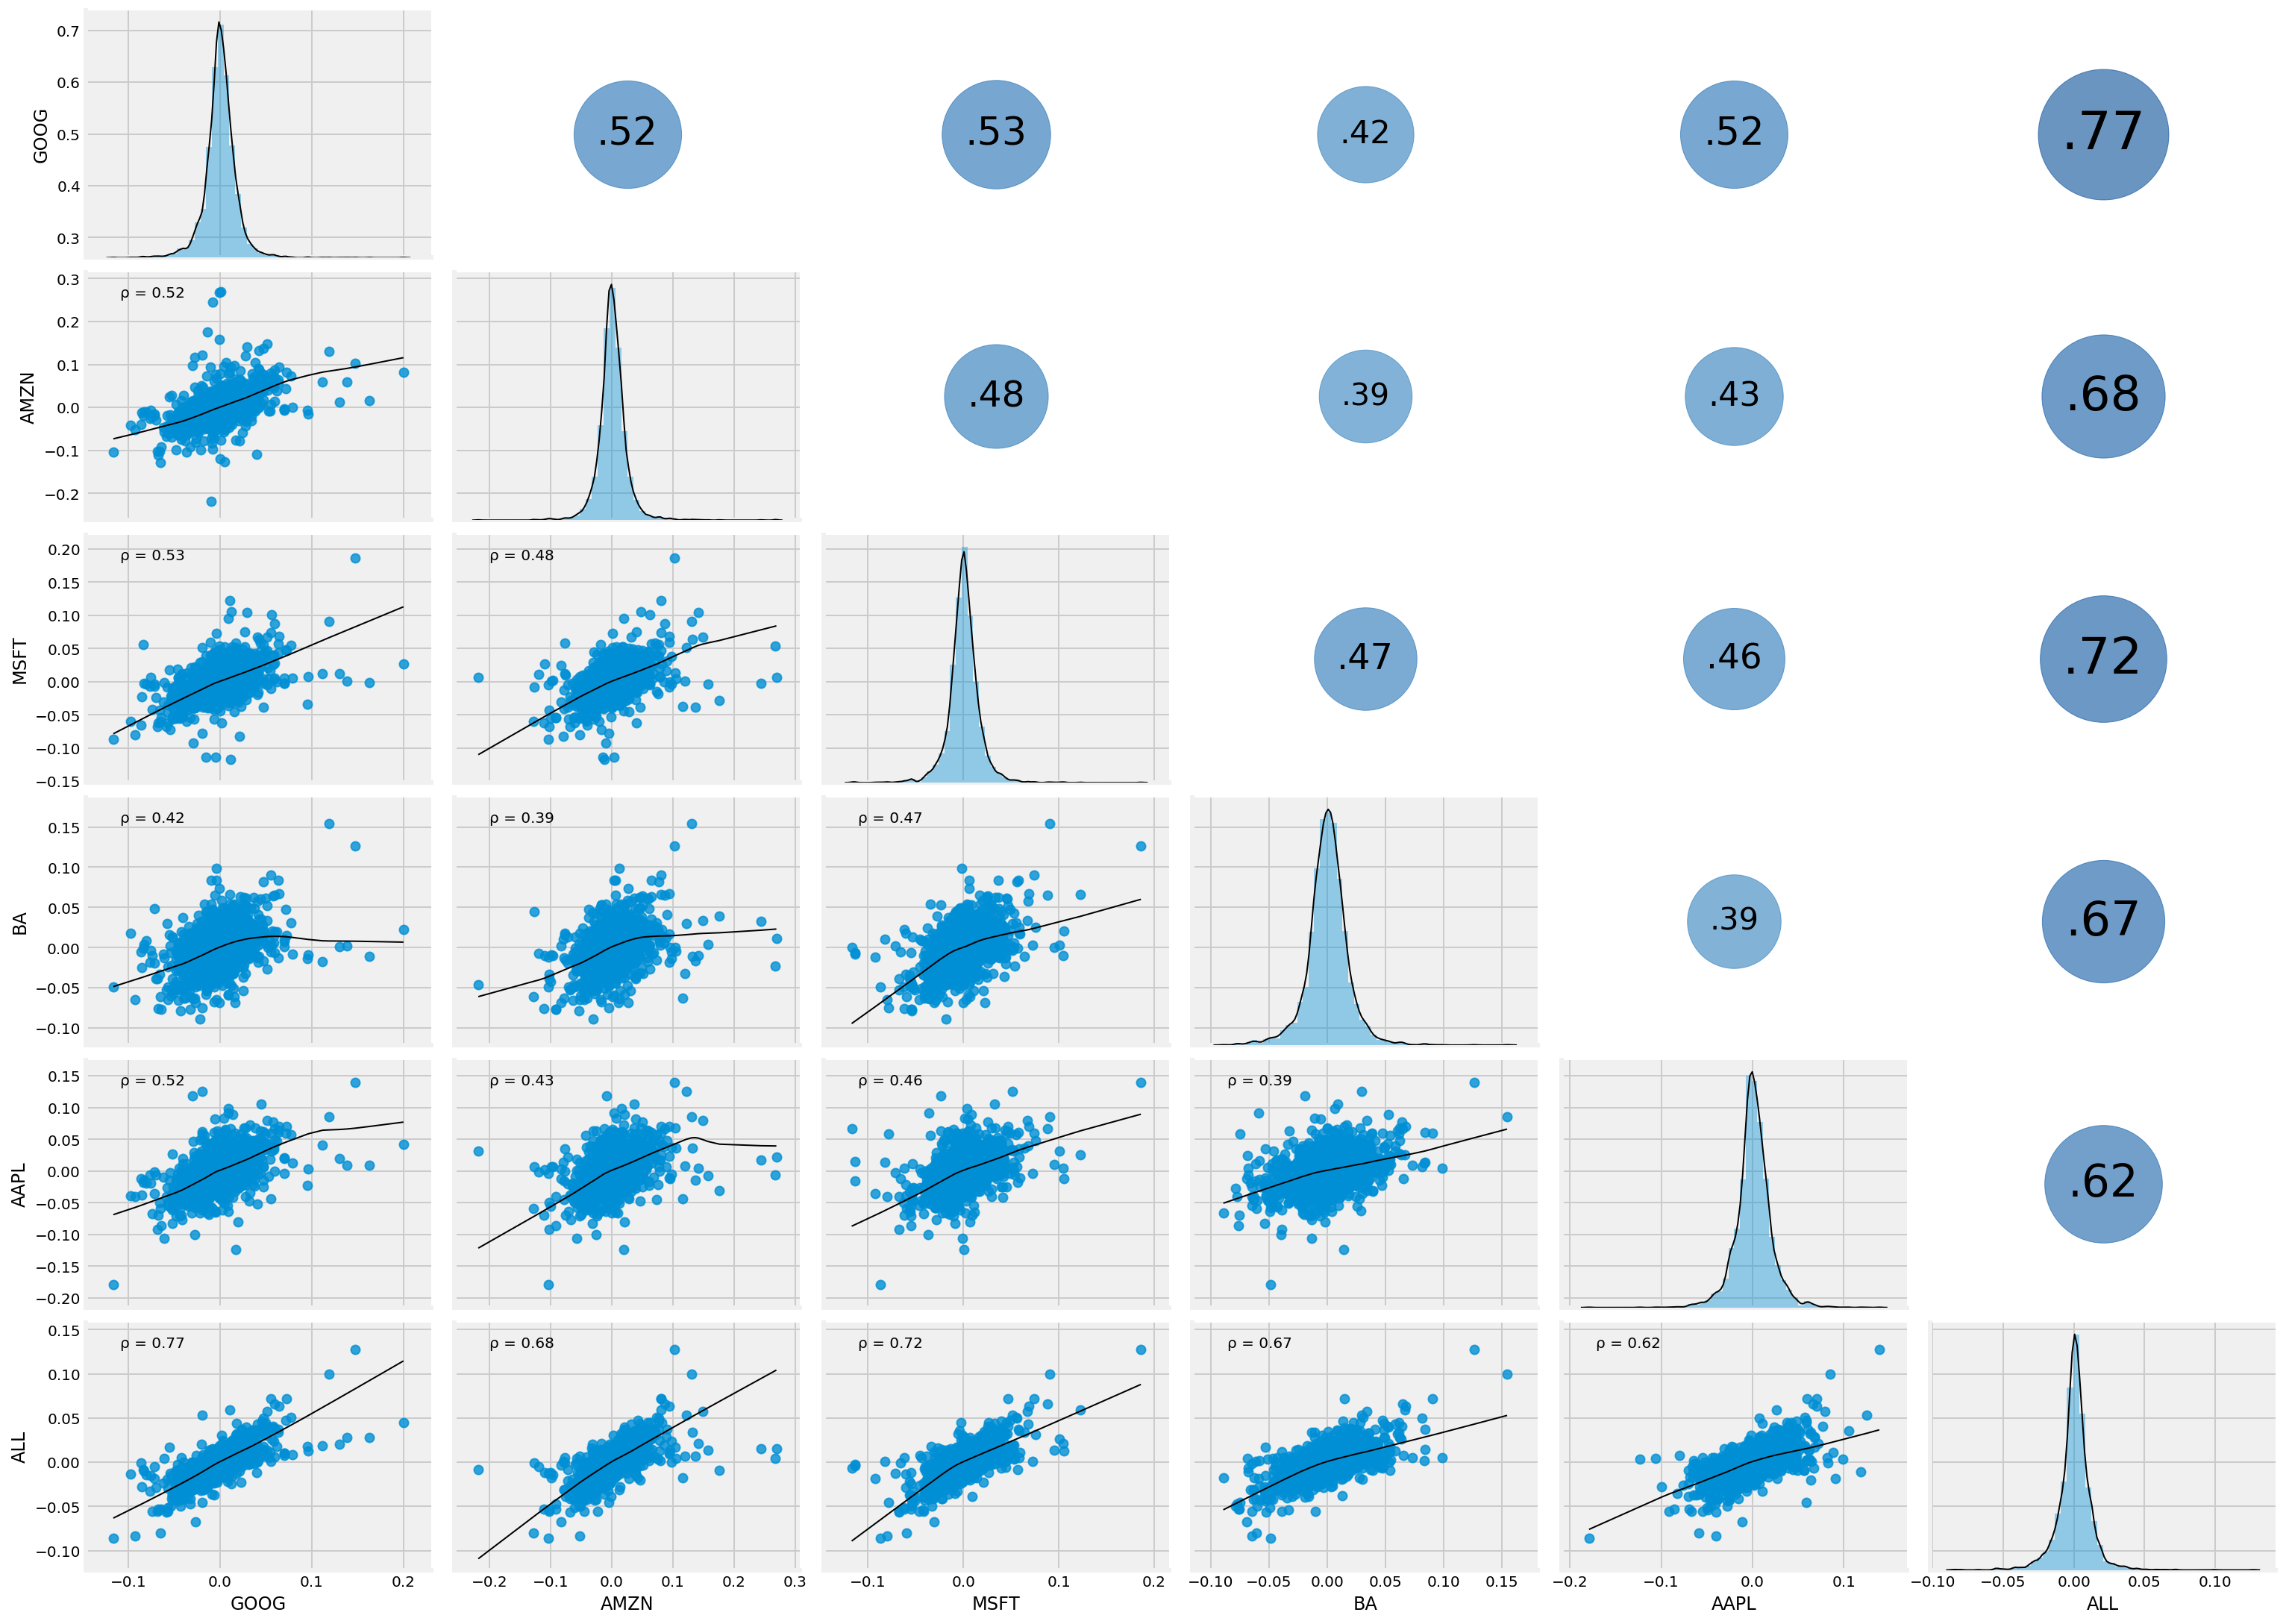

In [84]:
g = sns.PairGrid(daily_returns, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

# Stationarity Test

In [85]:
def ADFuller(df):
    index=df.index
    columns = df.columns
    df_stats = pd.DataFrame(columns=['p-value'], index=columns)
    for col in columns:
        df_stats.loc[col]=adfuller(df[col], autolag='AIC')[1]
    return df_stats

In [86]:
adfuller_stocks = ADFuller(stocks)

In [87]:
adfuller_stocks

p-value
GOOG  0.997167
AMZN    0.9984
MSFT         1
BA    0.968055
AAPL  0.998344
ALL   0.998924

In [88]:
sns.barplot(adfuller_stocks['P-value'])
ax = sns.barplot(adfuller_stocks.index, adfuller_stocks.values.reshape(-1,))

KeyError: 'P-value'

In [ ]:
adfuller_stocks.values.reshape(-1,).shape

In [ ]:
adfuller_returns = ADFuller(daily_returns)
adfuller_returns

In [62]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(
            x=adfuller_stocks.index, y=adfuller_stocks['P-value'],
            text=adfuller_stocks['P-value'],
            textposition='auto',)])

fig.show()

In [56]:
!pip install plotly

     |████████████████████████████████| 11.5 MB 17.2 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=02d9cafa912b2081ffe284c2ec0c554949896e9610dcdbb59a963b3185f11852
  Stored in directory: /Users/pierlucalanzi/Library/Caches/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [58]:
adfuller_stocks

In [89]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(daily_returns["AAPL"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                           d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=-16842.980, BIC=-16812.135, Time=6.707 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=-12857.678, BIC=-12845.340, Time=0.493 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=-14752.368, BIC=-14727.692, Time=3.903 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=-16606.700, BIC=-16582.023, Time=3.201 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=-12859.678, BIC=-12853.509, Time=0.471 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=-15265.697, BIC=-15241.021, Time=3.888 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=-16974.928, BIC=-16937.913, Time=10.918 seconds
Fit ARIMA(1,1,1)x(1,1,0,12) [intercept=True]; AIC=-16124.528, BIC=-16093.683, Time=14.658 seconds
Fit ARIMA(1,1,1)x(2

In [90]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 3543
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                8694.186
Date:                                 Mon, 25 May 2020   AIC                         -17376.372
Time:                                         11:11:43   BIC                         -17339.358
Sample:                                              0   HQIC                        -17363.168
                                                - 3543                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.283e-06    1.2e-06     -1.904      0.057   -4.63e-06    6.72e-08
ma.L1         -0.9335      0.006   -150.183      0.000      -0.946      -0.921
ar.S.L12      -0.7469      0.100     -7.448      0.000      -0.943      -0.550
ma.S.L12      -0.1968      0.094     -2.098      0.036      -0.381      -0.013
ma.S.L24      -0.7719      0.091     -8.512      0.000      -0.950      -0.594
sigma2         0.0004   5.87e-06     74.886      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                      110.49   Jarque-Bera (JB):              4923.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
amazon_arima_model = SARIMAX(amazon["Close"],order=(2,1,2))
amazon_results = amazon_arima_model.fit()
amazon_results.summary()

In [92]:
stepwise_model.Model

AttributeError: 'ARIMA' object has no attribute 'Model'

In [94]:
stepwise_model.predict(daily_returns["AAPL"])

AttributeError: 'ARIMA' object has no attribute 'get_prediction'

In [101]:
train = daily_returns["AAPL"][:'2017-01-01']
test = daily_returns["AAPL"]['2017-01-01':'2017-02-01']
stepwise_model.fit(train)
future_forecast = stepwise_model.predict(n_periods=21)
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=["AAPL"])

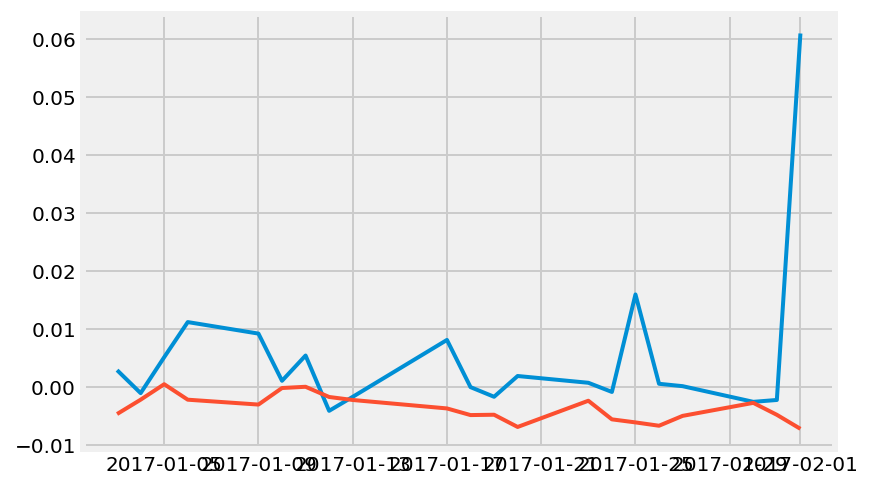

In [104]:
plt.plot(test)
plt.plot(future_forecast)

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(apple['Close'], model='additive', extrapolate_trend='freq')

# We define a function to be able to customize the single plots if we want.
# Alternatively, we can just call decomposition_multiplicative.plot()

def plotseasonal(decomposition, axes, title=""):
    decomposition.observed.plot(ax=axes[0], legend=False)
    axes[0].set_title(title)
    axes[0].set_ylabel('Observed')
    decomposition.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    decomposition.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    decomposition.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,12))
plotseasonal(decomposition_additive, axes[:,1], "Additive Decomposition")
plt.tight_layout()
plt.show();

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [107]:
apple

High         Low        Open       Close       Volume  \
Date                                                                      
2006-01-03   10.678572   10.321428   10.340000   10.678572  201808600.0   
2006-01-04   10.854285   10.642858   10.732857   10.710000  154900900.0   
2006-01-05   10.700000   10.535714   10.690000   10.625714  112355600.0   
2006-01-06   10.957143   10.650000   10.750000   10.900000  176114400.0   
2006-01-09   11.028571   10.820000   10.961429   10.864285  168760200.0   
...                ...         ...         ...         ...          ...   
2020-04-27  284.540009  279.950012  281.799988  283.170013   29271900.0   
2020-04-28  285.829987  278.200012  285.079987  278.579987   28001200.0   
2020-04-29  289.670013  283.890015  284.730011  287.730011   34320200.0   
2020-04-30  294.529999  288.350006  289.959991  293.799988   45766000.0   
2020-05-01  299.000000  285.850006  286.250000  289.070007   60154200.0   

             Adj Close  Name  
Date                          
2006-01-03    9.244411  AAPL  
2006-01-04    9.271619  AAPL  
2006-01-05    9.198654  AAPL  
2006-01-06    9.436100  AAPL  
2006-01-09    9.405183  AAPL  
...                ...   ...  
2020-04-27  282.405548  AAPL  
2020-04-28  277.827911  AAPL  
2020-04-29  286.953247  AAPL  
2020-04-30  293.006836  AAPL  
2020-05-01  288.289612  AAPL  

[3607 rows x 7 columns]

In [111]:
apple['Close'].index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01'],
              dtype='datetime64[ns]', name='Date', length=3607, freq=None)

In [112]:
diabetic_drugs_series = pd.read_csv('others/a10.csv', parse_dates=['date'], index_col='date')

decomposition_multiplicative = seasonal_decompose(diabetic_drugs_series['value'], model='multiplicative', extrapolate_trend='freq')
decomposition_additive = seasonal_decompose(diabetic_drugs_series['value'], model='additive', extrapolate_trend='freq')



In [117]:
apple_close = apple['Close']

In [119]:
apple_close.set_index('Date')

AttributeError: 'Series' object has no attribute 'set_index'

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose

diabetic_drugs_series = pd.read_csv('others/a10.csv', parse_dates=['date'], index_col='date')

decomposition_multiplicative = seasonal_decompose(daily_stocks['AAPL'], model='multiplicative', extrapolate_trend='freq')
decomposition_additive = seasonal_decompose(diabetic_drugs_series['AAPL'], model='additive', extrapolate_trend='freq')

# We define a function to be able to customize the single plots if we want.
# Alternatively, we can just call decomposition_multiplicative.plot()

def plotseasonal(decomposition, axes, title=""):
    decomposition.observed.plot(ax=axes[0], legend=False)
    axes[0].set_title(title)
    axes[0].set_ylabel('Observed')
    decomposition.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    decomposition.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    decomposition.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,12))
plotseasonal(decomposition_multiplicative, axes[:,0],"Multiplicative Decomposition")
plotseasonal(decomposition_additive, axes[:,1], "Additive Decomposition")
plt.tight_layout()
plt.show();

KeyError: 'AAPL'

In [131]:
apple['Close'].to_dataframe()

AttributeError: 'Series' object has no attribute 'to_dataframe'

In [130]:
type(diabetic_drugs_series)

pandas.core.frame.DataFrame

In [128]:
seasonal_decompose(apple['Close'], model='multiplicative', extrapolate_trend='freq')

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [132]:
diabetic_drugs_series = pd.read_csv('others/a10.csv', parse_dates=['date'], index_col='date')

In [136]:
type(stocks)

pandas.core.frame.DataFrame

In [137]:
type(diabetic_drugs_series['value'])

pandas.core.series.Series

In [138]:
type(stocks['AAPL'])

pandas.core.series.Series

In [139]:
decomposition_multiplicative = seasonal_decompose(stocks['AAPL'], model='multiplicative', extrapolate_trend='freq')

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [142]:
daily_stocks = stocks.asfreq('D').ffill()

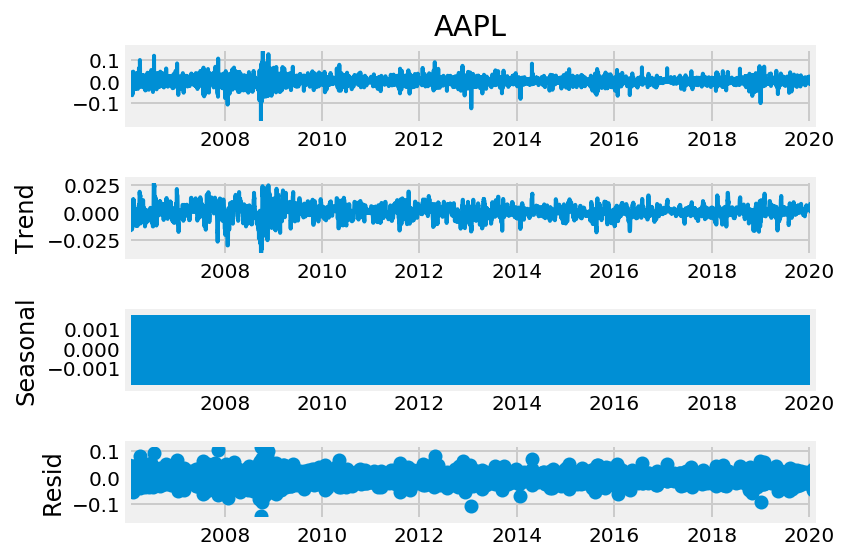

In [175]:
decomposition_multiplicative = seasonal_decompose(daily_stocks['AAPL'].pct_change().dropna(), model='additive', extrapolate_trend='freq')
g=decomposition_multiplicative.plot()

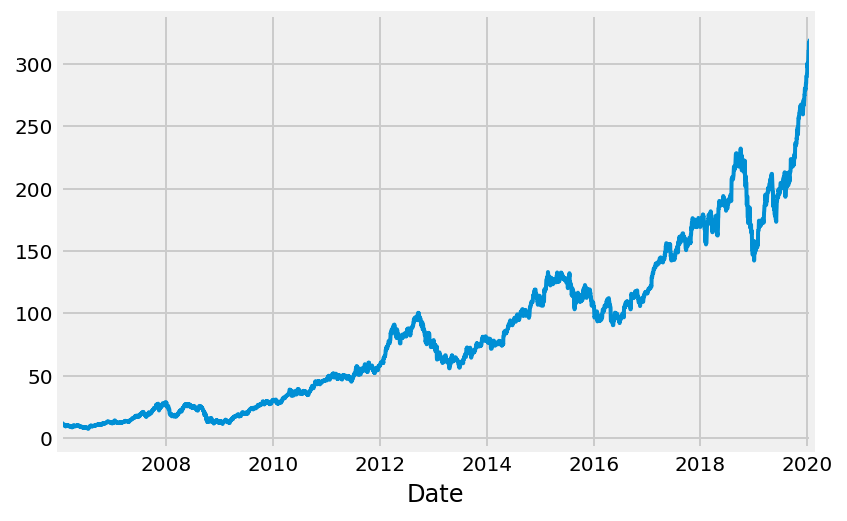

In [172]:
daily_stocks['AAPL'].plot()

In [145]:
decomposition_additive = seasonal_decompose(daily_stocks['AAPL'], model='addittive', extrapolate_trend='freq')

In [204]:
lags = pd.DataFrame()
for i in range(1,11):
    lags['t-%02d'%i] = daily_returns["AAPL"].shift(i)
lags['t'] = daily_returns['AAPL'].values
lags.dropna(inplace=True)

In [205]:
lags

t-01      t-02      t-03      t-04      t-05      t-06  \
Date                                                                     
2006-01-19 -0.026207 -0.010282  0.015423  0.004648  0.037596  0.063248   
2006-01-20 -0.041823 -0.026207 -0.010282  0.015423  0.004648  0.037596   
2006-01-23 -0.037323 -0.041823 -0.026207 -0.010282  0.015423  0.004648   
2006-01-24  0.020765 -0.037323 -0.041823 -0.026207 -0.010282  0.015423   
2006-01-25 -0.020986  0.020765 -0.037323 -0.041823 -0.026207 -0.010282   
...              ...       ...       ...       ...       ...       ...   
2020-01-27 -0.002882  0.004816  0.003570 -0.006777  0.011071  0.012526   
2020-01-28 -0.029405 -0.002882  0.004816  0.003570 -0.006777  0.011071   
2020-01-29  0.028289 -0.029405 -0.002882  0.004816  0.003570 -0.006777   
2020-01-30  0.020932  0.028289 -0.029405 -0.002882  0.004816  0.003570   
2020-01-31 -0.001449  0.020932  0.028289 -0.029405 -0.002882  0.004816   

                t-07      t-08      t-09      t-10         t  
Date                                                          
2006-01-19 -0.003277  0.025813 -0.007870  0.002943 -0.041823  
2006-01-20  0.063248 -0.003277  0.025813 -0.007870 -0.037323  
2006-01-23  0.037596  0.063248 -0.003277  0.025813  0.020765  
2006-01-24  0.004648  0.037596  0.063248 -0.003277 -0.020986  
2006-01-25  0.015423  0.004648  0.037596  0.063248 -0.024198  
...              ...       ...       ...       ...       ...  
2020-01-27 -0.004286 -0.013503  0.021364  0.002261 -0.029405  
2020-01-28  0.012526 -0.004286 -0.013503  0.021364  0.028289  
2020-01-29  0.011071  0.012526 -0.004286 -0.013503  0.020932  
2020-01-30 -0.006777  0.011071  0.012526 -0.004286 -0.001449  
2020-01-31  0.003570 -0.006777  0.011071  0.012526 -0.044339  

[3533 rows x 11 columns]

In [206]:
input_variables = lags.columns[lags.columns!='t']
target_variable = 't'

In [207]:
from sklearn.ensemble import RandomForestRegressor
X = lags[input_variables]
y = lags[target_variable]

In [208]:
forest = RandomForestRegressor(n_estimators=500, random_state=1)
forest.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [209]:
feature_names = input_variables
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_names[indices[f]], importances[indices[f]]))




Feature ranking:
1. feature 0 t-01 (0.112583)
2. feature 5 t-06 (0.104827)
3. feature 4 t-05 (0.102365)
4. feature 9 t-10 (0.102002)
5. feature 2 t-03 (0.101147)
6. feature 7 t-08 (0.100308)
7. feature 6 t-07 (0.099743)
8. feature 1 t-02 (0.098864)
9. feature 3 t-04 (0.091553)
10. feature 8 t-09 (0.086608)


In [210]:
def PlotRFFeatureImportance(forest,feature_names,sort_importance=True):
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    if (sort_importance):
        indices = np.argsort(importances)[::-1]
    else:
        indices = np.argsort(feature_names)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_names[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), feature_names[indices],rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

Feature ranking:
1. feature 9 t-10 (0.102002)
2. feature 8 t-09 (0.086608)
3. feature 7 t-08 (0.100308)
4. feature 6 t-07 (0.099743)
5. feature 5 t-06 (0.104827)
6. feature 4 t-05 (0.102365)
7. feature 3 t-04 (0.091553)
8. feature 2 t-03 (0.101147)
9. feature 1 t-02 (0.098864)
10. feature 0 t-01 (0.112583)


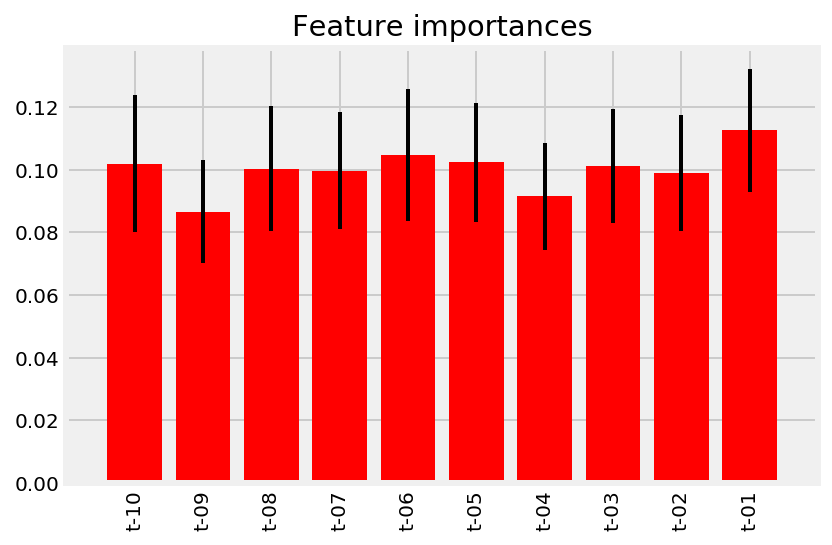

In [212]:
PlotRFFeatureImportance(forest,input_variables,False)

Feature ranking:
1. feature 0 t-01 (0.112583)
2. feature 5 t-06 (0.104827)
3. feature 4 t-05 (0.102365)
4. feature 9 t-10 (0.102002)
5. feature 2 t-03 (0.101147)
6. feature 7 t-08 (0.100308)
7. feature 6 t-07 (0.099743)
8. feature 1 t-02 (0.098864)
9. feature 3 t-04 (0.091553)
10. feature 8 t-09 (0.086608)


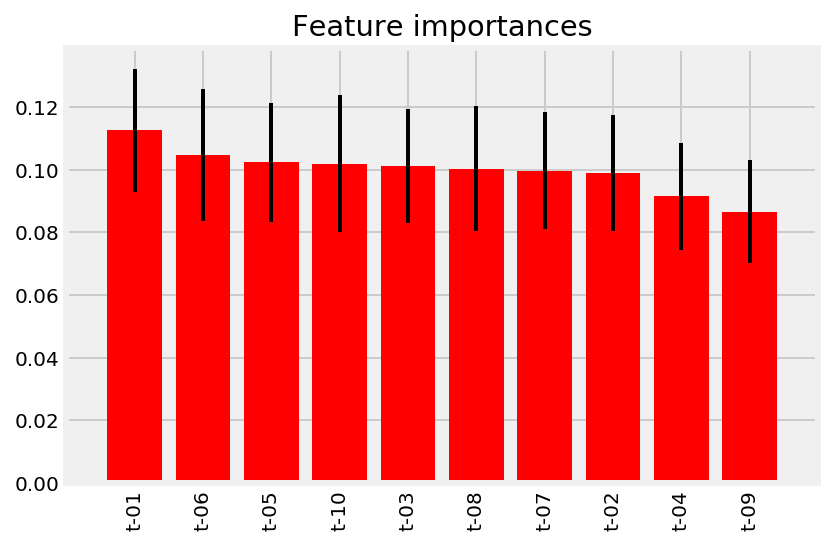

In [213]:
PlotRFFeatureImportance(forest,input_variables)

In [215]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)
names = lags.columns
columns=[]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        columns.append(names[i])

print("Columns with predictive power:", columns )

Columns with predictive power: ['t-01', 't-03', 't-05', 't-06']


Feature ranking:
1. feature 1 t-02 (0.114597)
2. feature 9 t-10 (0.111801)
3. feature 4 t-05 (0.105218)
4. feature 3 t-04 (0.100779)
5. feature 5 t-06 (0.099446)
6. feature 2 t-03 (0.098473)
7. feature 7 t-08 (0.096708)
8. feature 8 t-09 (0.095861)
9. feature 6 t-07 (0.091957)
10. feature 0 t-01 (0.085161)


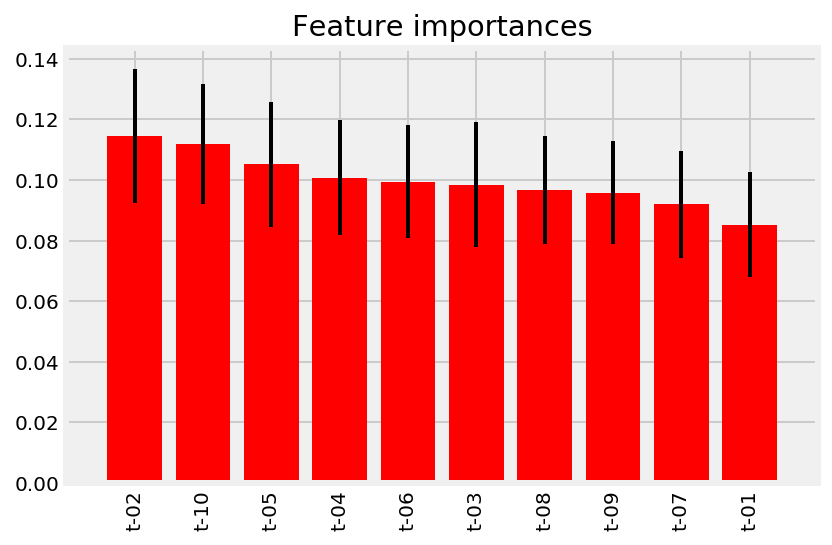

In [216]:
PlotRFFeatureImportance(model,lags.columns)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
result = seasonal_decompose(data, model='additive', freq=1)

In [220]:

columns=stocks.columns
stocks_mean=pd.DataFrame(columns=columns)
for col in columns:
    stocks_mean[col] = stocks[col].rolling(window = 80).mean()
stocks_mean.dropna(inplace=True)

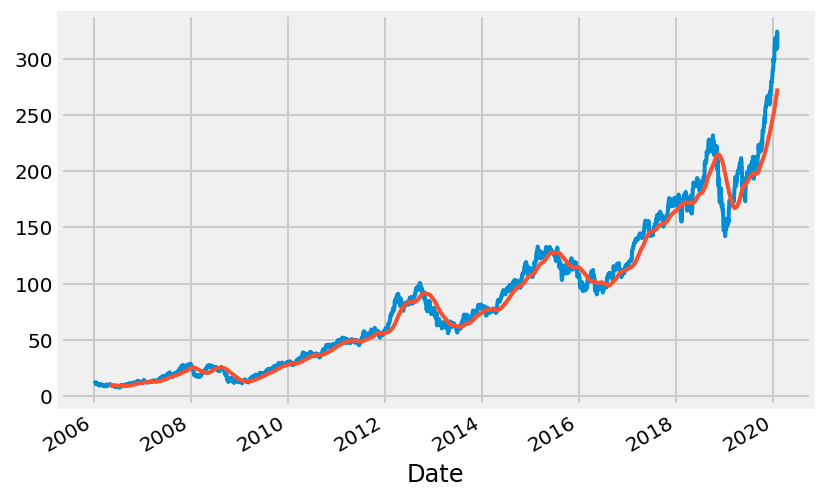

In [221]:
stocks['AAPL'].plot()
stocks_mean['AAPL'].plot()

In [246]:
df_forecasting=pd.DataFrame(stocks["AAPL"])
for i in range(1,5):
    df_forecasting['t-%02d'%i] = df_forecasting["AAPL"].shift(i)
df_forecasting=df_forecasting.dropna()

df_forecasting["t-01-diff"] = df_forecasting["t-01"].diff()
df_forecasting["t-01-rolling"] = df_forecasting["t-01"].rolling(window = 80).mean()

df_forecasting.dropna(inplace=True)

In [282]:
target_variable = 'AAPL'
input_variables = df_forecasting.columns[df_forecasting.columns!=target_variable]


In [283]:
input_variables

Index(['t-01', 't-02', 't-03', 't-04', 't-01-diff', 't-01-rolling'], dtype='object')

In [284]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
X=df_forecasting[input_variables]
y=df_forecasting[target_variable]

X_train, X_test = X[:'2019-01-01'], X['2019-01':'2020-01-01']
y_train, y_test = y[:'2019-01-01'], y['2019-01':'2020-01-01']

In [285]:
rf_model_extras = RandomForestRegressor(n_estimators=500)
rf_model_extras.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [286]:
yp=rf_model_extras.predict(X_test)
mean_absolute_error(y_test, yp)

predicted = pd.Series(yp, index=y_test.index)

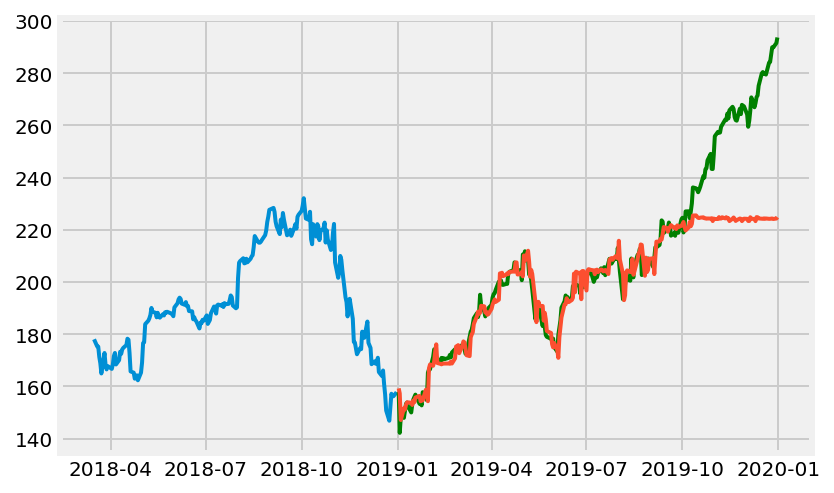

In [293]:
plt.plot(y_train[-200:],label='Train')
plt.plot(y_test,label='Test', color='green')
plt.plot(predicted,label='Predicted')

In [289]:
X_train

t-01        t-02        t-03        t-04  t-01-diff  \
Date                                                                    
2006-05-03   10.231428    9.942857   10.055715    9.908571   0.288571   
2006-05-04   10.162857   10.231428    9.942857   10.055715  -0.068571   
2006-05-05   10.161428   10.162857   10.231428    9.942857  -0.001429   
2006-05-08   10.270000   10.161428   10.162857   10.231428   0.108572   
2006-05-09   10.270000   10.270000   10.161428   10.162857   0.000000   
...                ...         ...         ...         ...        ...   
2018-12-24  150.729996  156.830002  160.889999  166.070007  -6.100006   
2018-12-26  146.830002  150.729996  156.830002  160.889999  -3.899994   
2018-12-27  157.169998  146.830002  150.729996  156.830002  10.339996   
2018-12-28  156.149994  157.169998  146.830002  150.729996  -1.020004   
2018-12-31  156.229996  156.149994  157.169998  146.830002   0.080002   

            t-01-rolling  
Date                      
2006-05-03      9.892964  
2006-05-04      9.883750  
2006-05-05      9.874964  
2006-05-08      9.858946  
2006-05-09      9.837500  
...                  ...  
2018-12-24    204.217251  
2018-12-26    203.265376  
2018-12-27    202.417126  
2018-12-28    201.523626  
2018-12-31    200.622001  

[3188 rows x 6 columns]

We can repeat this procedure for every stock and ...

In [294]:
def add_variables(df, target_variable, no_lags, no_diffs, rolling_windows=[10]):
    df_forecasting = pd.DataFrame(df[target_variable])
    
    if (no_lags>0):
        for i in range(1,no_lags+1):
            df_forecasting['t-%02d'%i] = df_forecasting[target_variable].shift(i)
            
    if (no_diffs>0):
        for i in range(1,no_diffs+1):
            if ('t-%02d-diff'%i in df_forecasting.columns):
                df_forecasting['t-%02d-diff'%i] = df_forecasting['t-%02d'%i].diff()
                
    for window in rolling_windows:
        df_forecasting["t-01-rw"+str(window)] = df_forecasting["t-01"].rolling(window = window).mean()

    df_forecasting.dropna(inplace=True)
    
    return df_forecasting

In [295]:
df_forecasting2 = add_variables(stocks,'AAPL',no_lags=10,no_diffs=1,rolling_windows=[80])

In [296]:
df_forecasting2.head()

AAPL       t-01       t-02       t-03       t-04      t-05  \
Date                                                                          
2006-04-28  10.055715   9.908571   9.735714   9.452857   9.392858  9.577143   
2006-05-01   9.942857  10.055715   9.908571   9.735714   9.452857  9.392858   
2006-05-02  10.231428   9.942857  10.055715   9.908571   9.735714  9.452857   
2006-05-03  10.162857  10.231428   9.942857  10.055715   9.908571  9.735714   
2006-05-04  10.161428  10.162857  10.231428   9.942857  10.055715  9.908571   

                t-06      t-07      t-08      t-09      t-10  t-01-rw80  
Date                                                                     
2006-04-28  9.661428  9.378572  9.460000  9.258572  9.495714   9.915268  
2006-05-01  9.577143  9.661428  9.378572  9.460000  9.258572   9.907482  
2006-05-02  9.392858  9.577143  9.661428  9.378572  9.460000   9.897893  
2006-05-03  9.452857  9.392858  9.577143  9.661428  9.378572   9.892964  
2006-05-04  9.735714  9.452857  9.392858  9.577143  9.661428   9.883750

In [327]:
def evaluate_regressor(regressor,df,target_variable):
    
    input_variables = df.columns[df.columns!=target_variable]
        
    X=df[input_variables]
    y=df[target_variable]

    X_train, X_test = X[:'2019-01-01'], X['2019-01':'2020-01-01']
    y_train, y_test = y[:'2019-01-01'], y['2019-01':'2020-01-01']
    
    regressor.fit(X_train, y_train)
    
    yp=regressor.predict(X_test)
    
    mae = mean_absolute_error(y_test, yp)
    predicted = pd.Series(yp, index=y_test.index)
    
#     plt.plot(y_train[-200:],label='Train')
    plt.plot(y_test,label='Test', color='green')
    plt.plot(predicted,label='Predicted MAE %.3f'%mae)
    plt.legend()
    plt.show()
    
    return predicted,mae

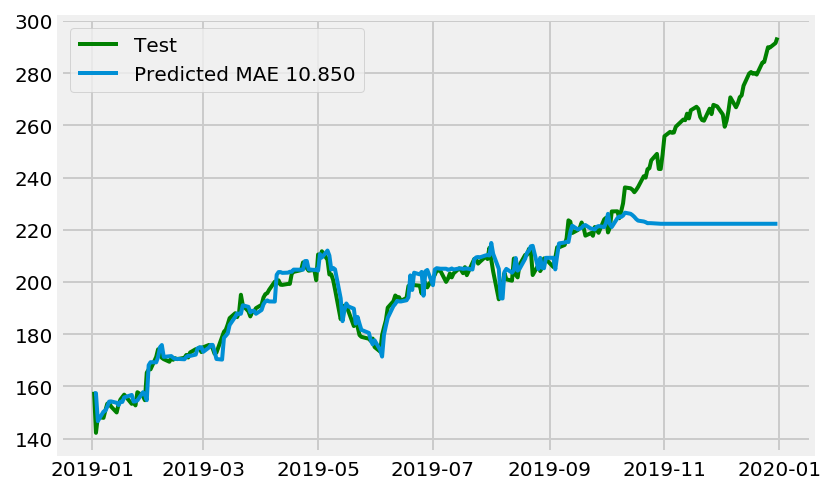

(Date
 2019-01-02    157.329680
 2019-01-03    157.389439
 2019-01-04    146.665959
 2019-01-07    150.308680
 2019-01-08    150.654060
                  ...    
 2019-12-24    222.282821
 2019-12-26    222.282821
 2019-12-27    222.282821
 2019-12-30    222.282821
 2019-12-31    222.282821
 Length: 252, dtype: float64,
 10.850457179599337)

In [328]:
evaluate_regressor(RandomForestRegressor(n_estimators=500),df_forecasting2,'AAPL')

In [303]:
df_forecasting2[['t-01', 't-02', 't-03', 't-04', 't-05', 't-06', 't-07', 't-08', 't-09',
       't-10', 't-01-rw80']]

t-01        t-02        t-03        t-04        t-05  \
Date                                                                     
2006-04-28    9.908571    9.735714    9.452857    9.392858    9.577143   
2006-05-01   10.055715    9.908571    9.735714    9.452857    9.392858   
2006-05-02    9.942857   10.055715    9.908571    9.735714    9.452857   
2006-05-03   10.231428    9.942857   10.055715    9.908571    9.735714   
2006-05-04   10.162857   10.231428    9.942857   10.055715    9.908571   
...                ...         ...         ...         ...         ...   
2020-01-27  318.309998  319.230011  317.700012  316.570007  318.730011   
2020-01-28  308.950012  318.309998  319.230011  317.700012  316.570007   
2020-01-29  317.690002  308.950012  318.309998  319.230011  317.700012   
2020-01-30  324.339996  317.690002  308.950012  318.309998  319.230011   
2020-01-31  323.869995  324.339996  317.690002  308.950012  318.309998   

                  t-06        t-07        t-08        t-09        t-10  \
Date                                                                     
2006-04-28    9.661428    9.378572    9.460000    9.258572    9.495714   
2006-05-01    9.577143    9.661428    9.378572    9.460000    9.258572   
2006-05-02    9.392858    9.577143    9.661428    9.378572    9.460000   
2006-05-03    9.452857    9.392858    9.577143    9.661428    9.378572   
2006-05-04    9.735714    9.452857    9.392858    9.577143    9.661428   
...                ...         ...         ...         ...         ...   
2020-01-27  315.239990  311.339996  312.679993  316.959991  310.329987   
2020-01-28  318.730011  315.239990  311.339996  312.679993  316.959991   
2020-01-29  316.570007  318.730011  315.239990  311.339996  312.679993   
2020-01-30  317.700012  316.570007  318.730011  315.239990  311.339996   
2020-01-31  319.230011  317.700012  316.570007  318.730011  315.239990   

             t-01-rw80  
Date                    
2006-04-28    9.915268  
2006-05-01    9.907482  
2006-05-02    9.897893  
2006-05-03    9.892964  
2006-05-04    9.883750  
...                ...  
2020-01-27  267.936500  
2020-01-28  268.991000  
2020-01-29  270.225125  
2020-01-30  271.519125  
2020-01-31  272.729875  

[3464 rows x 11 columns]

In [308]:
df_forecasting2 = add_variables(stocks,'AAPL',no_lags=10,no_diffs=1,rolling_windows=[10,20,30,40,50,60,70,80,90,100])

In [309]:
df_forecasting2

AAPL        t-01        t-02        t-03        t-04  \
Date                                                                     
2006-05-26    9.078571    9.190000    9.048572    9.021428    9.054286   
2006-05-30    8.745714    9.078571    9.190000    9.048572    9.021428   
2006-05-31    8.538571    8.745714    9.078571    9.190000    9.048572   
2006-06-01    8.881429    8.538571    8.745714    9.078571    9.190000   
2006-06-02    8.808572    8.881429    8.538571    8.745714    9.078571   
...                ...         ...         ...         ...         ...   
2020-01-27  308.950012  318.309998  319.230011  317.700012  316.570007   
2020-01-28  317.690002  308.950012  318.309998  319.230011  317.700012   
2020-01-29  324.339996  317.690002  308.950012  318.309998  319.230011   
2020-01-30  323.869995  324.339996  317.690002  308.950012  318.309998   
2020-01-31  309.510010  323.869995  324.339996  317.690002  308.950012   

                  t-05        t-06        t-07        t-08        t-09  ...  \
Date                                                                    ...   
2006-05-26    9.215714    9.025714    9.322857    9.282857    9.684286  ...   
2006-05-30    9.054286    9.215714    9.025714    9.322857    9.282857  ...   
2006-05-31    9.021428    9.054286    9.215714    9.025714    9.322857  ...   
2006-06-01    9.048572    9.021428    9.054286    9.215714    9.025714  ...   
2006-06-02    9.190000    9.048572    9.021428    9.054286    9.215714  ...   
...                ...         ...         ...         ...         ...  ...   
2020-01-27  318.730011  315.239990  311.339996  312.679993  316.959991  ...   
2020-01-28  316.570007  318.730011  315.239990  311.339996  312.679993  ...   
2020-01-29  317.700012  316.570007  318.730011  315.239990  311.339996  ...   
2020-01-30  319.230011  317.700012  316.570007  318.730011  315.239990  ...   
2020-01-31  318.309998  319.230011  317.700012  316.570007  318.730011  ...   

             t-01-rw10   t-01-rw20   t-01-rw30   t-01-rw40   t-01-rw50  \
Date                                                                     
2006-05-26    9.251714    9.679000    9.630048    9.582893    9.429486   
2006-05-30    9.192428    9.630143    9.616143    9.585750    9.427314   
2006-05-31    9.098571    9.570286    9.599048    9.580393    9.417486   
2006-06-01    9.024143    9.485643    9.568333    9.570107    9.405429   
2006-06-02    8.980000    9.421571    9.551762    9.573679    9.406457   
...                ...         ...         ...         ...         ...   
2020-01-27  315.709000  306.537999  297.195997  289.307498  284.277399   
2020-01-28  315.571002  307.489999  298.468665  290.423998  285.217200   
2020-01-29  315.644003  308.884500  300.009665  291.670248  286.281600   
2020-01-30  316.810004  310.525500  301.649332  293.097498  287.515599   
2020-01-31  318.063004  312.036501  303.116332  294.590248  288.677799   

             t-01-rw60   t-01-rw70   t-01-rw80   t-01-rw90  t-01-rw100  
Date                                                                    
2006-05-26    9.432024    9.517796    9.556089    9.701286    9.868014  
2006-05-30    9.417595    9.506224    9.534893    9.671222    9.852014  
2006-05-31    9.402119    9.487143    9.515464    9.642936    9.832371  
2006-06-01    9.388524    9.465673    9.493893    9.617032    9.811500  
2006-06-02    9.378667    9.451571    9.484732    9.592429    9.791314  
...                ...         ...         ...         ...         ...  
2020-01-27  279.310666  273.755428  267.936500  262.635444  257.948199  
2020-01-28  280.405000  274.807285  268.991000  263.616000  258.980700  
2020-01-29  281.645500  275.997571  270.225125  264.670667  260.065700  
2020-01-30  282.905167  277.269857  271.519125  265.819333  261.176300  
2020-01-31  284.039333  278.519285  272.729875  266.998666  262.282400  

[3444 rows x 21 columns]

Index(['t-01', 't-02', 't-03', 't-04', 't-05', 't-06', 't-07', 't-08', 't-09',
       't-10', 't-01-rw10', 't-01-rw20', 't-01-rw30', 't-01-rw40', 't-01-rw50',
       't-01-rw60', 't-01-rw70', 't-01-rw80', 't-01-rw90', 't-01-rw100'],
      dtype='object')


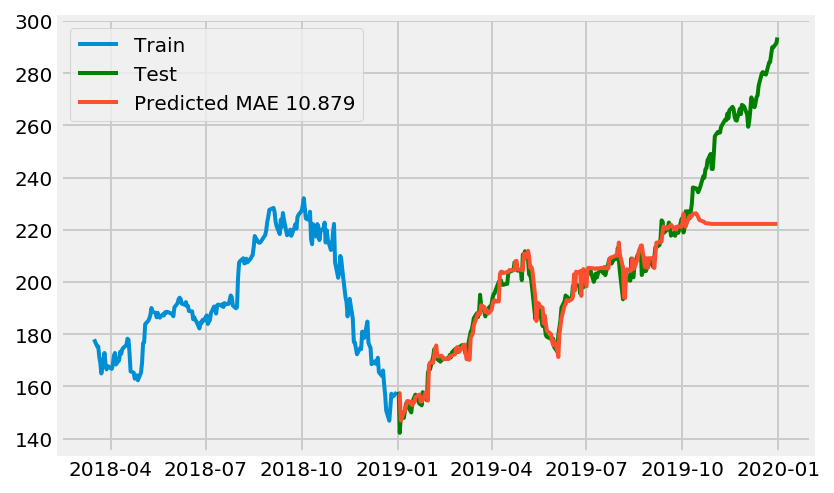

(Date
 2019-01-02    157.357080
 2019-01-03    157.332700
 2019-01-04    146.920119
 2019-01-07    150.223699
 2019-01-08    150.658839
                  ...    
 2019-12-24    222.222621
 2019-12-26    222.222621
 2019-12-27    222.222621
 2019-12-30    222.222621
 2019-12-31    222.222621
 Length: 252, dtype: float64,
 10.878982151939754)

In [310]:
evaluate_regressor(RandomForestRegressor(n_estimators=500),df_forecasting2,'AAPL')

Index(['t-01', 't-02', 't-03', 't-04', 't-05', 't-06', 't-07', 't-08', 't-09',
       't-10', 't-01-rw10', 't-01-rw20', 't-01-rw30', 't-01-rw40', 't-01-rw50',
       't-01-rw60', 't-01-rw70', 't-01-rw80', 't-01-rw90', 't-01-rw100'],
      dtype='object')


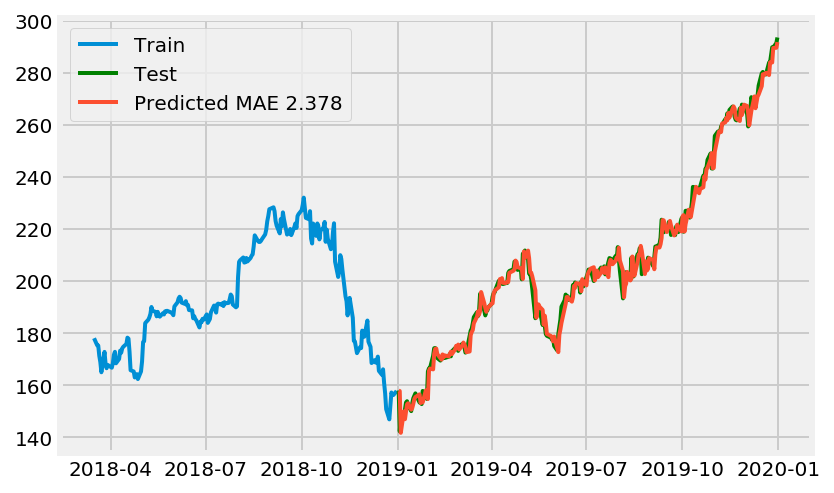

(Date
 2019-01-02    157.869049
 2019-01-03    157.732691
 2019-01-04    141.649810
 2019-01-07    149.879370
 2019-01-08    146.895875
                  ...    
 2019-12-24    284.147351
 2019-12-26    284.035786
 2019-12-27    289.614356
 2019-12-30    289.692448
 2019-12-31    291.869240
 Length: 252, dtype: float64,
 2.3779695681064323)

In [314]:
from sklearn.linear_model import LinearRegression,Lasso
evaluate_regressor(LinearRegression(),df_forecasting2,'AAPL')

Index(['t-01', 't-02', 't-03', 't-04', 't-05', 't-06', 't-07', 't-08', 't-09',
       't-10', 't-01-rw10', 't-01-rw20', 't-01-rw30', 't-01-rw40', 't-01-rw50',
       't-01-rw60', 't-01-rw70', 't-01-rw80', 't-01-rw90', 't-01-rw100'],
      dtype='object')


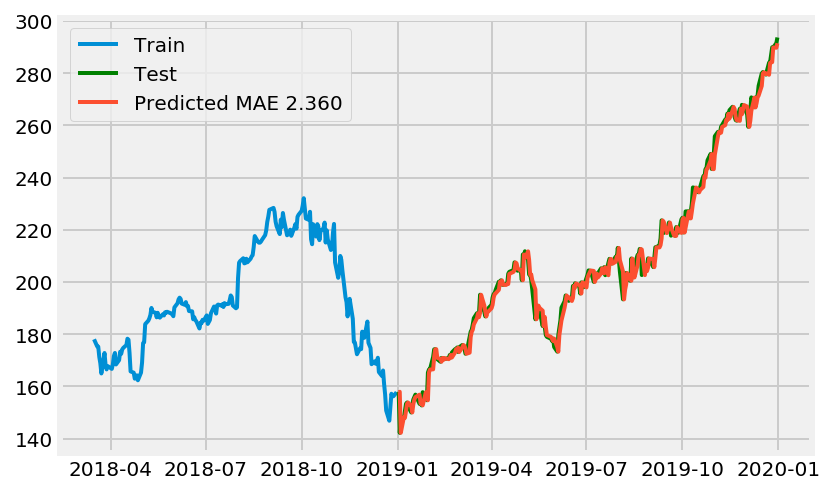

(Date
 2019-01-02    157.739984
 2019-01-03    157.919823
 2019-01-04    142.199791
 2019-01-07    148.266013
 2019-01-08    147.935963
                  ...    
 2019-12-24    283.927299
 2019-12-26    284.197119
 2019-12-27    289.833624
 2019-12-30    289.723868
 2019-12-31    291.442888
 Length: 252, dtype: float64,
 2.3601942947137364)

In [315]:
evaluate_regressor(Lasso(),df_forecasting2,'AAPL')

In [316]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [317]:
!pip install xgboost

     |████████████████████████████████| 1.1 MB 4.4 MB/s eta 0:00:01


In [320]:
df_forecasting_basic = add_variables(stocks,'AAPL',no_lags=1,no_diffs=0,rolling_windows=[])

In [321]:
df_forecasting_basic

AAPL        t-01
Date                              
2006-01-04   10.710000   10.678572
2006-01-05   10.625714   10.710000
2006-01-06   10.900000   10.625714
2006-01-09   10.864285   10.900000
2006-01-10   11.551429   10.864285
...                ...         ...
2020-01-27  308.950012  318.309998
2020-01-28  317.690002  308.950012
2020-01-29  324.339996  317.690002
2020-01-30  323.869995  324.339996
2020-01-31  309.510010  323.869995

[3543 rows x 2 columns]

Index(['t-01'], dtype='object')


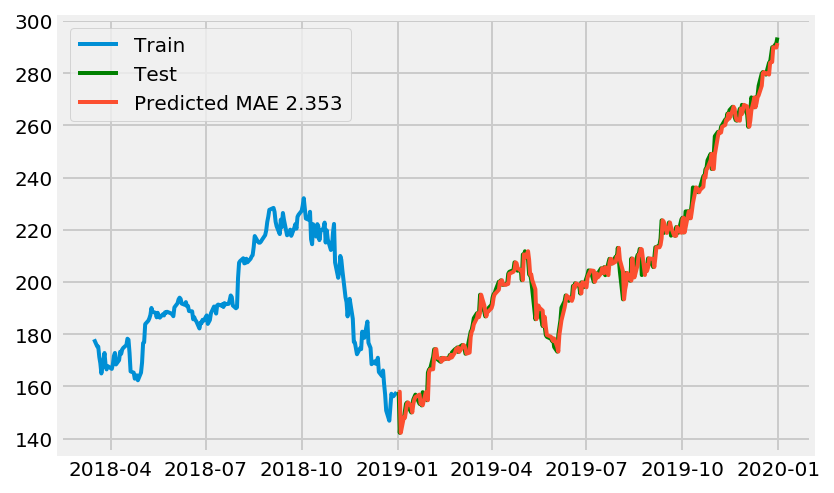

(Date
 2019-01-02    157.767567
 2019-01-03    157.947522
 2019-01-04    142.220804
 2019-01-07    148.289531
 2019-01-08    147.959598
                  ...    
 2019-12-24    284.001254
 2019-12-26    284.271187
 2019-12-27    289.910026
 2019-12-30    289.800033
 2019-12-31    291.519676
 Length: 252, dtype: float64,
 2.3527580299935247)

In [322]:
evaluate_regressor(LinearRegression(),df_forecasting_basic,'AAPL')

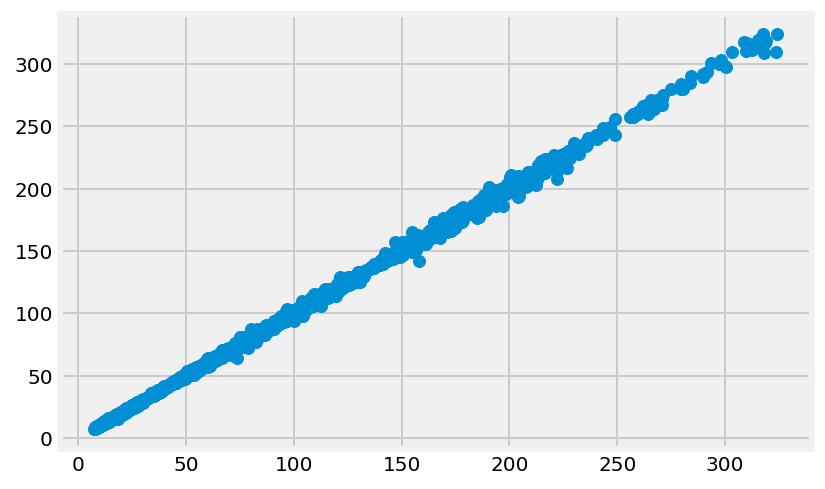

In [323]:
plt.scatter(df_forecasting_basic['t-01'],df_forecasting_basic['AAPL'])

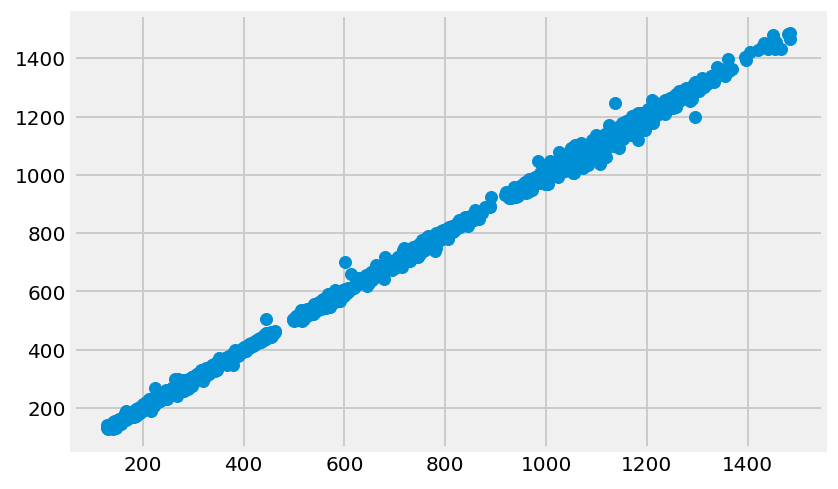

In [326]:
df_forecasting_basic_google = add_variables(stocks,'GOOG',no_lags=1,no_diffs=0,rolling_windows=[])
plt.scatter(df_forecasting_basic_google['t-01'],df_forecasting_basic_google['GOOG'])